# 14 Generative Adversarial Networks
Welcome to the 14th (and the last) session of the series on Practical Machine Learning. Today we're going to learn about Generative Adversarial Networks through a Computer Vision Problem, and also going to discuss what's next for you after this course. We'll also use this opportunity to summarize what we've learnt. 

So let's get started!

## Generative Adversarial Networks

Generative Adversarial Networks were [introduced](https://arxiv.org/abs/1406.2661) in 2014 by Ian Goodfellow while he was doing his PhD. Ian Goodfellow is now working as the Director of Machine Learning at Apple. But let's make sure we understand what its aim is. 

### What are Generative Networks?
Let us leave out the Adversarial part of the term "Generative Adversarial Networks"(or GANs for short). What we are essentially trying to do is create a Generative Model. We've already seen what that means. Instead of classification of prediction of some regression value, we would like our Neural Networks to "Generate", say, images. We've seen one example of this - *Segmentation* of images, where we created a model that took an image, and also gave an output as a result. But ultimately this was a pixel wise classification problem. That's okay, what if we wanted to create a regression type problem? Like feed in a picture of a low quality image, and the Neural Network would give back a high quality image? 

![](https://drive.google.com/uc?id=1CP5PxTtyyiYHEuL9G7wsWrJ5bpJMV3v_)

(essentially, you're creating a model that can output some pixel value in a certain range (between 0 and 255), across the three channels of colours (RGB). 

*Or* a black and white image, and make the Neural Net give back coloured images?

![](https://drive.google.com/uc?id=1vFCvK2ZqrGHQbFic_qu6WmD92Eg4BY3C)

*Or* make a Neural Net fill missing parts of an Image (called Image InPainting). (Or remove things from an image, like, for example, photo bombers?)

![](https://drive.google.com/uc?id=1T-sSEZGi561rN1FfoSOE6LT70FpVID9f)

![](https://drive.google.com/uc?id=14XlOZgUAlnSXm4LvLnbx4IuaM3OqQsFM)

*Or* Create Realistic Images of people that don't even exist!

![](https://drive.google.com/uc?id=1kn3vpoMMOY_7FBfWFsEW42vAr59QeMO9)

This person was created using GANs, with just arbitrarily engineered noise as input. Look at how well defined the output is. There is a website called [This Person Does Not Exist](https://thispersondoesnotexist.com/), that shows an AI generated image of people that probably don't even exist. Try refreshing the website page a few times. You will genuinely be impressed. 

Also check out [This Art Does Not Exist](https://thisartworkdoesnotexist.com/), [This Horse Does Not Exist](https://thishorsedoesnotexist.com/), [This Cat Does Not Exist](https://thiscatdoesnotexist.com/) and [This Chemical Does Not Exist](https://thischemicaldoesnotexist.com/). 

*Or* a model that creates emojis from your faces. They are quite the trend on social media nowadays. 

![](https://drive.google.com/uc?id=1n2EaVtF2UdGrx6r91xliZTOux1_Bt2tf)

*Or* Models that make you look old. Have you tried the FaceApp app, that makes you look older, or younger, or change your hair, your facial hair, your gender, and even add or remove scars. This all works through Generative AI Models. 

![](https://drive.google.com/uc?id=1PTTLIbnF09XJrhI_KSOfvSN-xuNfXv2i)

All these require a similar type of Neural Network Modeling. Feed in some kind of input (image, in terms of pixel tensors), which depends on what task you want to do, and get an output, also in terms of pizel values, just transformed according to our needs. Seems straightforward, doesn't it?

And how do we do it? The UNet style architecture. All that is dfiffent is that output is not a map of classes, but individual pixel values. Since, this iis a regression problem, we would use a MSE type loss to account the loss between predicted output and target pixel values of the transformed image. Actually, remember that GANs came out in 2014, and UNets were officially published in 2015, and also weren't recognised for a long time in the DL community. But the approach remains more or less the same. 

### The story of GANs

One night, Ian Goodfellow was out drinking with his friends, and they were discussing methods to create Generative Models. All previous attemps somewhat worked, but were still not top notch. Here's why. Look at these two images. 

![](https://drive.google.com/uc?id=1W9Q73eSEsRPx7VCjiJ1Z2J_OheNOLjef)

On the left is our target image, and on the right the prediction from GANs. There is not much MSE loss between the two, because the model has more or less figured out the colours in most of the picture. But the GAN still doesn't know that what spatial features are important. Like in this case, our model does not know that the predicted image is blurry. The problem somewhat lies in the loss function.

So Goodfellow randomly came up with this idea - *what if we pit two Neural Nets against each other?*. This came to be known as Generative Adversarial Networks. (Adversarial meaning against one another!). The idea is as follows. 

Design a two models that try to beat one another. One of them would be the Generative Network that produces the final image we wish for. By making two models learn and try to outperform the other, both the models would push each other to be better and better in a guided fashion, and at the end, the model performance would be better than simple generative modeling. 

So how do we build this model?

### GAN Modeling

The idea is simple. Create a Generative Model. Its usually called the *Generator*, the job of which is to take some input, and give a target output. Now obviously, initially the model suffers from the incomprehension of feature importance problem that we described above. The other model is a simple binary Image classifier, the job of which is to predict which image is a Ground Truth Image, and which image is generated by the Generative Model. This model is also called the *Discriminator* or the *Critic* Model. Based on that we receive some loss function (standard Cross Entropy Loss). Our job is to get the maximum accuracy, meaning we would like the Critic Model to accurately identify which image is fake (Generated), and which is real. The higher the accuracy, the more difficult it gets for the Generative Model to "fool" the Critic Model. A perfect Critic Model would catch every image that is fake. And a perfect Generator Model would fool the Critic Model each time. When both these models become good, the generator model will be so good at predicting images that look like the Ground truth images, that our job would be done at that point! So evaluating our Critic model on some ground truth images and some predicted images will help us train the Critic Model to be slightly better at differentiating between the two. 

Now taking the accuracy, or loss value of the Critic Model as the loss formulation of the Generator as well, we can train the Generator to become slightly better at fooling the Critic Model, or in other words, convincing the Critic model that the predicted image is infact a ground truth image. 

Once you train the Generator for one epoch, get some predictions, and make the Critic Model evaluate again. Back and forth, and in the end, the Generative Model would learn how to predict really good images. 

![](https://drive.google.com/uc?id=1U7vk9QV3YzLPJoGpOpG8n9vhPXpcPZAy)

Let us see how this is implemented. Let us start by importiing necessary libraries. We'll be using the fastai library for this. 

### Inspirations from Reinforcement Learning
There is this concept in Reinforcement Learning called the *Actor Critic* Modeling Principles, which is quite similar to the GAN modeling principle. However, the driving source is rewards and errors, rather than losses and accuracies. Also, this concept is still quite crude, and there are not much concrete examples of this concept. But it's been around a long time (atleast since 1980s) and is worth a read if you're interested!



In [ ]:
!pip install -Uqq fastai >./tmp
from fastai.basics import *
from fastai.vision.all import *

## Implementing GANs

### Setting up the data

Before we start, let us see what problem we'll be working on. In the initial days of GANs, researchers used to try using GANs to take some random noise as input, and output some legible result. Let us implement a model based on that. We will be trying to generate images from a dataset called the LSUN dataset, which contains lots of images of bedrooms. 

So in order to create this dataset, we need to create a mapping from this noisy tensor to these images. 

In [ ]:
path = untar_data(URLs.LSUN_BEDROOMS)
path.ls()

(#16) [Path('/root/.fastai/data/bedroom/8'),Path('/root/.fastai/data/bedroom/0'),Path('/root/.fastai/data/bedroom/1'),Path('/root/.fastai/data/bedroom/6'),Path('/root/.fastai/data/bedroom/b'),Path('/root/.fastai/data/bedroom/2'),Path('/root/.fastai/data/bedroom/e'),Path('/root/.fastai/data/bedroom/7'),Path('/root/.fastai/data/bedroom/9'),Path('/root/.fastai/data/bedroom/5')...]

Let us look how the images in the dataset look like.


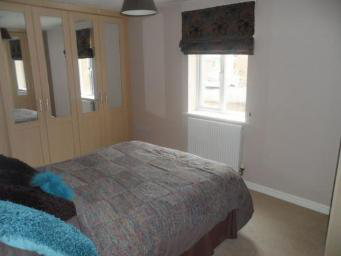

In [ ]:
Image.open(get_image_files(path)[0])

Having downloaded the dataset, now let us create the mapping from a noisy (single channel )2D tensor to our dataset images. 

In [ ]:
class InvisibleTensor(TensorBase): #just a tensor representative. It has all the properties of a tensor, except it doesnt hold any values. Its like an iron cast for tensors
    def show(self, ctx=None, **kwargs): return ctx

def generate_noise(fn, size=100): return cast(torch.randn(size), InvisibleTensor) #cast will give he properties of latter to former

In [ ]:
@typedispatch
def show_batch(x:InvisibleTensor, y:TensorImage, samples, ctxs=None, max_n=10, nrows=None, ncols=None, figsize=None, **kwargs):
    if ctxs is None: ctxs = get_grid(min(len(samples), max_n), nrows=nrows, ncols=ncols, figsize=figsize)
    ctxs = show_batch[object](x, y, samples, ctxs=ctxs, max_n=max_n, **kwargs)
    return ctxs

@typedispatch
def show_results(x:InvisibleTensor, y:TensorImage, samples, outs, ctxs=None, max_n=10, nrows=None, ncols=None, figsize=None, **kwargs):
    if ctxs is None: ctxs = get_grid(min(len(samples), max_n), nrows=nrows, ncols=ncols, add_vert=1, figsize=figsize)
    ctxs = [b.show(ctx=c, **kwargs) for b,c,_ in zip(outs.itemgot(0),ctxs,range(max_n))]
    return ctxs

In [ ]:
bs = 128
size = 64

Obviously we know that we need to put our data into dataloaders. Before that we define a class that will do on the preprocessing and transformations of the data for us. This class in Fastai is named as the DataBlock class, and all you have to tell it is

* Where the data is
* What type is your x and y
* How should the model retrieve files from a path destination 
* How do you want to split your data
* Finally, what transformations you want to apply


In [ ]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize(size, method=ResizeMethod.Crop), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

Finally once you tell fastai what to do with your data, we tell it where to get the data, that is the path where the files are stored, and return us with dataloaders, that can directly be fed into the model.

In [ ]:
dls = dblock.dataloaders(path, path=path, bs=bs)

Let us see how this data looks like.

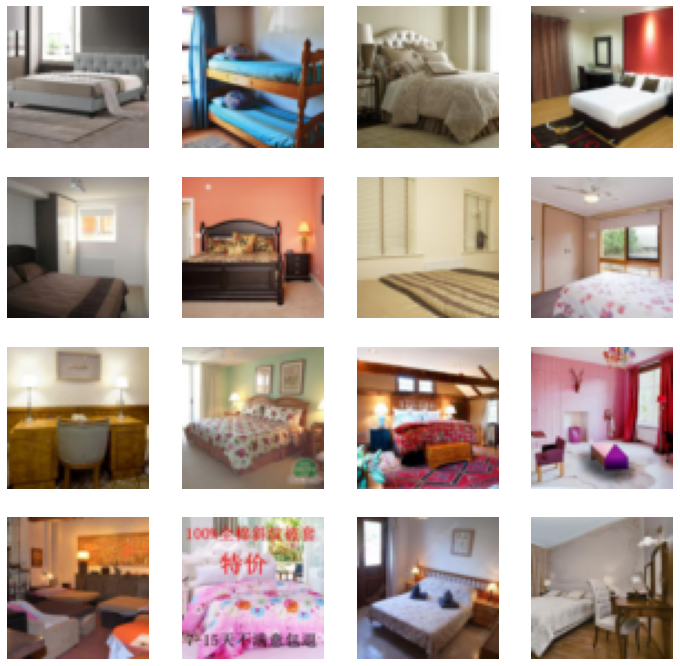

In [ ]:
dls.show_batch(max_n=16)

In [ ]:
x,y=dls.one_batch()
x.shape,y.shape

(torch.Size([128, 100]), torch.Size([128, 3, 64, 64]))

### Implementing the GAN Module

Till now we've trained a single architecture at one time. This time, we have 2 architectures running parallely. So we first need a class that can wrap up these 2 architectures. Also only one of these architectures is trainable at once, and the other needs to be freezed, so we need to factor that in. 

In [ ]:
class GANModule(Module):
    "Wrapper around a `generator` and a `critic` to create a GAN."
    def __init__(self, generator=None, critic=None, gen_mode=False):
        if generator is not None: self.generator=generator
        if critic    is not None: self.critic   =critic
        store_attr('gen_mode')

    def forward(self, *args): return self.generator(*args) if self.gen_mode else self.critic(*args)

    def switch(self, gen_mode=None):
        "Put the module in generator mode if `gen_mode` = True, in critic mode otherwise."
        self.gen_mode = (not self.gen_mode) if gen_mode is None else gen_mode

So we've defined a class method called `switch` that ensures that only one architecture runs at once. And this is alternatingly changed. By default the parameter `gen_mode` is set to None, which ensures that we simply switch whatever mode we are in to its opposite. But this parameter can be used to manually set the model to one of the modes, for example during evaluation and testing of the model, or visualization of model outputs. So this gives us more control over our model. 

Now that we've created a basic class that can handle both the critic and the generator, we need to define the architectures of the critic and the generator. For now we will implement a very basic architecture - a simple UNet based generator and a simple 2D CNN binary classifier as the critic model . It's as simple as that!

In [ ]:
@delegates(ConvLayer.__init__)
def basic_critic(in_size, n_channels, n_features=64, n_extra_layers=0, norm_type=NormType.Batch, **kwargs):
    "A basic critic for images `n_channels` x `in_size` x `in_size`."
    layers = [ConvLayer(n_channels, n_features, 4, 2, 1, norm_type=None, **kwargs)]
    cur_size, cur_ftrs = in_size//2, n_features
    layers += [ConvLayer(cur_ftrs, cur_ftrs, 3, 1, norm_type=norm_type, **kwargs) for _ in range(n_extra_layers)]
    while cur_size > 4:
        layers.append(ConvLayer(cur_ftrs, cur_ftrs*2, 4, 2, 1, norm_type=norm_type, **kwargs))
        cur_ftrs *= 2 ; cur_size //= 2
    init = kwargs.get('init', nn.init.kaiming_normal_)
    layers += [init_default(nn.Conv2d(cur_ftrs, 1, 4, padding=0), init), Flatten()]
    return nn.Sequential(*layers)

In [ ]:
??delegates

In [ ]:
basic_critic.__signature__

<Signature (in_size, n_channels, n_features=64, n_extra_layers=0, norm_type=<NormType.Batch: 1>, ks=3, stride=1, padding=None, bias=None, ndim=2, bn_1st=True, act_cls=<class 'torch.nn.modules.activation.ReLU'>, transpose=False, init='auto', xtra=None, bias_std=0.01, dilation: Union[int, Tuple[int, int]] = 1, groups: int = 1, padding_mode: str = 'zeros')>

Now for the generator, a simple UNet architecture can be generated as follows.

![](https://drive.google.com/uc?id=1ZMhr6LKKcfYobi499pYdQm6XIq83W-46)

In [ ]:
class AddChannels(Module):
    "Add `n_dim` channels at the end of the input."
    def __init__(self, n_dim): self.n_dim=n_dim
    def forward(self, x): return x.view(*(list(x.shape)+[1]*self.n_dim))

In [ ]:
@delegates(ConvLayer.__init__)
def basic_generator(out_size, n_channels, in_sz=100, n_features=64, n_extra_layers=0, **kwargs):
    "A basic generator from `in_sz` to images `n_channels` x `out_size` x `out_size`. Notice the adaptive nature. Does not depend on input size. The architecture dynamically changes with input size" 
    cur_size, cur_ftrs = 4, n_features//2
    while cur_size < out_size:  cur_size *= 2; cur_ftrs *= 2 #make cur_size larger than out_size
    layers = [AddChannels(2), ConvLayer(in_sz, cur_ftrs, 4, 1, transpose=True, **kwargs)] #we need to add channels because we will be adding a 2D shape noise tensor as input. 
    cur_size = 4
    while cur_size < out_size // 2: #add layers until you can get to the output size
        layers.append(ConvLayer(cur_ftrs, cur_ftrs//2, 4, 2, 1, transpose=True, **kwargs))
        cur_ftrs //= 2; cur_size *= 2
    layers += [ConvLayer(cur_ftrs, cur_ftrs, 3, 1, 1, transpose=True, **kwargs) for _ in range(n_extra_layers)]
    layers += [nn.ConvTranspose2d(cur_ftrs, n_channels, 4, 2, 1, bias=False), nn.Tanh()] #turns out tanh works better than sigmoid in GANs  
    return nn.Sequential(*layers)

In [ ]:
??ConvLayer #see for the transpose parameter
# https://github.com/fastai/fastai/blob/ab154927696338741e59e0ffc4774777c4a9781c/fastai/layers.py#L222

That's it! We're done writing the architectural details of our generator and critic models. Let us see how this works!

In [ ]:
critic = basic_critic(64, 3)
generator = basic_generator(64, 3)
mdl = GANModule(critic=critic, generator=generator)
real = torch.randn(2, 3, 64, 64)
real_preds=mdl(real) #by default in critic model
real_preds.shape

torch.Size([2, 1])

In [ ]:
mdl.switch() #not in gen mode
noise = torch.randn(2, 100)
fake = mdl(noise)
fake.shape

torch.Size([2, 3, 64, 64])

In [ ]:
mdl.switch() #mdl is back in critic mode
fake_pred = mdl(fake)
fake_pred.shape

torch.Size([2, 1])

Alright. Looks like our model is working correctly, exactly as intended. We obviously know that the sequential model is working correctly, but what next? Next we need to define loss functions. 

Before that, its important to remember that we are dealing with Critic Loss as well as the Discriminator Loss. Just like `GANModule`, we will define a class that can handle both the generator and the critic loss.

In [ ]:
class GANLoss(GANModule):
    "Wrapper around `crit_loss_func` and `gen_loss_func`"
    def __init__(self, gen_loss_func, crit_loss_func, gan_model):
        super().__init__()
        store_attr('gen_loss_func,crit_loss_func,gan_model')

    def generator(self, output, target):
        "Evaluate the `output` with the critic then uses `self.gen_loss_func`"
        fake_pred = self.gan_model.critic(output)
        self.gen_loss = self.gen_loss_func(fake_pred, output, target)
        return self.gen_loss

    def critic(self, real_pred, input):
        "Create some `fake_pred` with the generator from `input` and compare them to `real_pred` in `self.crit_loss_func`."
        fake = self.gan_model.generator(input).requires_grad_(False)
        fake_pred = self.gan_model.critic(fake)
        self.crit_loss = self.crit_loss_func(real_pred, fake_pred)
        return self.crit_loss

In [ ]:
def set_freeze_model(m, rg):
    for p in m.parameters(): p.requires_grad_(rg)

Once we've set up the loss function and some other training settings, we will define a class that can handle all of training of the model. We are defining a callback class that takes care of various methods throughout the various training stages.

In [ ]:
class GANTrainer(Callback):
    "Handles GAN Training."
    run_after = TrainEvalCallback
    def __init__(self, switch_eval=False, clip=None, beta=0.98, gen_first=False, show_img=True):
        store_attr('switch_eval,clip,gen_first,show_img')
        self.gen_loss,self.crit_loss = AvgSmoothLoss(beta=beta),AvgSmoothLoss(beta=beta)

    def _set_trainable(self):
        train_model = self.generator if     self.gen_mode else self.critic
        loss_model  = self.generator if not self.gen_mode else self.critic
        set_freeze_model(train_model, True)
        set_freeze_model(loss_model, False)
        if self.switch_eval:
            train_model.train()
            loss_model.eval()

    def before_fit(self):
        "Initialize smootheners."
        self.generator,self.critic = self.model.generator,self.model.critic
        self.gen_mode = self.gen_first
        self.switch(self.gen_mode)
        self.crit_losses,self.gen_losses = [],[]
        self.gen_loss.reset() ; self.crit_loss.reset()


    def before_validate(self):
        "Switch in generator mode for showing results."
        self.switch(gen_mode=True)

    def before_batch(self):
        "Clamp the weights with `self.clip` if it's not None, set the correct input/target."
        if self.training and self.clip is not None:
            for p in self.critic.parameters(): p.data.clamp_(-self.clip, self.clip)
        if not self.gen_mode:
            (self.learn.xb,self.learn.yb) = (self.yb,self.xb)

    def after_batch(self):
        "Record `last_loss` in the proper list."
        if not self.training: return
        if self.gen_mode:
            self.gen_loss.accumulate(self.learn)
            self.gen_losses.append(self.gen_loss.value)
            self.last_gen = self.learn.to_detach(self.pred)
        else:
            self.crit_loss.accumulate(self.learn)
            self.crit_losses.append(self.crit_loss.value)

    def before_epoch(self):
        "Put the critic or the generator back to eval if necessary."
        self.switch(self.gen_mode)

    def switch(self, gen_mode=None):
        "Switch the model and loss function, if `gen_mode` is provided, in the desired mode."
        self.gen_mode = (not self.gen_mode) if gen_mode is None else gen_mode
        self._set_trainable()
        self.model.switch(gen_mode)
        self.loss_func.switch(gen_mode)

We will also put the switcher into a class, so that it can be accessed easily by the learner class in the form of a callback. This prevents us from hardcoding everything, and providing flexibility of code.

In [ ]:
class FixedGANSwitcher(Callback):
    "Switcher to do `n_crit` iterations of the critic then `n_gen` iterations of the generator."
    run_after = GANTrainer
    def __init__(self, n_crit=1, n_gen=1): store_attr('n_crit,n_gen')
    def before_train(self): self.n_c,self.n_g = 0,0

    def after_batch(self):
        "Switch the model if necessary."
        if not self.training: return
        if self.learn.gan_trainer.gen_mode:
            self.n_g += 1
            n_iter,n_in,n_out = self.n_gen,self.n_c,self.n_g
        else:
            self.n_c += 1
            n_iter,n_in,n_out = self.n_crit,self.n_g,self.n_c
        target = n_iter if isinstance(n_iter, int) else n_iter(n_in)
        if target == n_out:
            self.learn.gan_trainer.switch()
            self.n_c,self.n_g = 0,0

The following peice of code is simply a class that can compute the critic and generator loss. Why one class? Because if you remember, the two calculations are not independent. Both models are involved in the calculation of one another./

In [ ]:
def gan_loss_from_func(loss_gen, loss_crit, weights_gen=None):
    "Define loss functions for a GAN from `loss_gen` and `loss_crit`."
    def _loss_G(fake_pred, output, target, weights_gen=weights_gen):
        ones = fake_pred.new_ones(fake_pred.shape[0])
        weights_gen = ifnone(weights_gen, (1.,1.))
        return weights_gen[0] * loss_crit(fake_pred, ones) + weights_gen[1] * loss_gen(output, target)

    def _loss_C(real_pred, fake_pred):
        ones  = real_pred.new_ones (real_pred.shape[0])
        zeros = fake_pred.new_zeros(fake_pred.shape[0])
        return (loss_crit(real_pred, ones) + loss_crit(fake_pred, zeros)) / 2

    return _loss_G, _loss_C

In [ ]:
#just functoins to take means and diifferences of predictions 
def _tk_mean(fake_pred, output, target): return fake_pred.mean()
def _tk_diff(real_pred, fake_pred): return real_pred.mean() - fake_pred.mean()

So we've finally defined everything and now simply need to create a learner class. The problem that comes over here is, how do we include two models and all the functionality we've defined. To overcome that, we've custom defined a wrapper on top of the fastai learner class to handle all of this. 

In [ ]:
@delegates()
class GANLearner(Learner):
    "A `Learner` suitable for GANs."
    def __init__(self, dls, generator, critic, gen_loss_func, crit_loss_func, switcher=None, gen_first=False,
                 switch_eval=True, show_img=True, clip=None, cbs=None, metrics=None, **kwargs):
        gan = GANModule(generator, critic)
        loss_func = GANLoss(gen_loss_func, crit_loss_func, gan)
        if switcher is None: switcher = FixedGANSwitcher(n_crit=5, n_gen=1)
        trainer = GANTrainer(clip=clip, switch_eval=switch_eval, gen_first=gen_first, show_img=show_img)
        cbs = L(cbs) + L(trainer, switcher)
        metrics = L(metrics) + L(*LossMetrics('gen_loss,crit_loss'))
        super().__init__(dls, gan, loss_func=loss_func, cbs=cbs, metrics=metrics, **kwargs)

    @classmethod
    def from_learners(cls, gen_learn, crit_learn, switcher=None, weights_gen=None, **kwargs):
        "Create a GAN from `learn_gen` and `learn_crit`."
        losses = gan_loss_from_func(gen_learn.loss_func, crit_learn.loss_func, weights_gen=weights_gen)
        return cls(gen_learn.dls, gen_learn.model, crit_learn.model, *losses, switcher=switcher, **kwargs)

    @classmethod
    def wgan(cls, dls, generator, critic, switcher=None, clip=0.01, switch_eval=False, **kwargs):
        "Create a WGAN from `data`, `generator` and `critic`."
        return cls(dls, generator, critic, _tk_mean, _tk_diff, switcher=switcher, clip=clip, switch_eval=switch_eval, **kwargs)

GANLearner.from_learners = delegates(to=GANLearner.__init__)(GANLearner.from_learners)
GANLearner.wgan = delegates(to=GANLearner.__init__)(GANLearner.wgan)

Now we'll just reintialize everything and see if it works.

In [ ]:
from fastai.callback.all import *
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [ ]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp,show_img=True)

In [ ]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [ ]:
learn.fit(40, 2e-4, wd=0.)

You will see that the results slowly improve over time. At first there is no sense in the predicted outputs. But slowly over the epochs you can start to make sense out of the images


## Exercise 

Your task today is to continue the training process bit by bit and see the model performance improve. You can see the result of training after each epoch by `learn.fit(1,***,***)`. 
